### Start

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/developer-survey-2024/survey_results_public.csv')

In [3]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [4]:
df = df[['Country', 'EdLevel', 'YearsCodePro',
       'Employment', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)

In [5]:
df = df[df['Salary'].notnull()]

In [6]:
df.head(10)

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0
392,United Kingdom of Great Britain and Northern I...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,"Employed, full-time",161044.0
395,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,"Employed, full-time",121018.0
398,United States of America,Some college/university study without earning ...,30,"Employed, full-time",195000.0
403,Bulgaria,Some college/university study without earning ...,20,"Employed, full-time",44586.0
409,France,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",50,"Employed, full-time",57999.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [8]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
# Filter where employment was full time
df = df[df['Employment'] == 'Employed, full-time']   
df = df.drop('Employment', axis=1) #Drop the column as it is no longer needed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       17527 non-null  object 
 1   EdLevel       17527 non-null  object 
 2   YearsCodePro  17527 non-null  object 
 3   Salary        17527 non-null  float64
dtypes: float64(1), object(3)
memory usage: 684.6+ KB


In [10]:
# Check countries value counts
df['Country'].value_counts()


Country
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
                                                        ... 
Botswana                                                   1
Barbados                                                   1
Senegal                                                    1
Suriname                                                   1
Mali                                                       1
Name: count, Length: 155, dtype: int64

In [11]:
# define a function to Separate Countries with 1 value counts as threshold to avoid overfitting 
def shorten_cat(cat, threshold): 
    map_cat = {} # Create a dictionary to map the categories into
    for i in range(len(cat)): # iterate through the Country categories
        if cat.values[i] >= threshold: # if the country value is greater than or equals the threshold
            map_cat[cat.index[i]] = cat.index[i]  # Keep the category as is
        else:
            map_cat[cat.index[i]] = 'Other Countries' # If not combine it into a new category 'other countries'
    return map_cat  

In [12]:
# Execute the funtion to shorten the Country categories
map_country = shorten_cat(df['Country'].value_counts(), 400)
df['Country'] = df['Country'].map(map_country)


In [13]:
# Check the Country categories value counts
df.Country.value_counts()

Country
Other Countries                                         5628
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
France                                                   719
Canada                                                   684
Brazil                                                   457
Spain                                                    431
Italy                                                    414
Netherlands                                              406
Australia                                                400
Name: count, dtype: int64

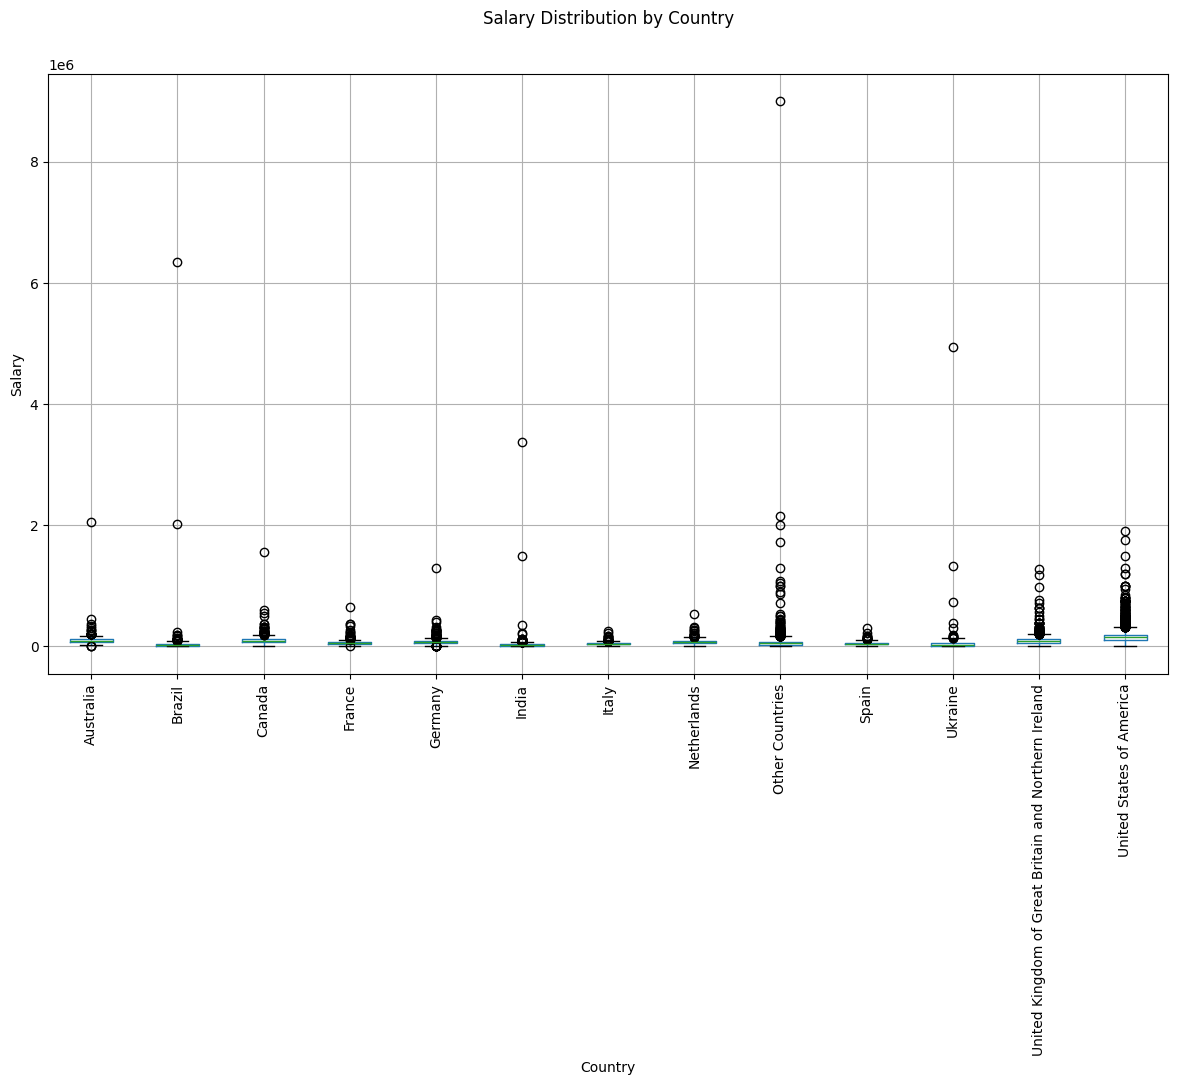

In [14]:
# Inspect the salary range to determine the bin edges
fig, ax = plt.subplots(1,1, figsize=(14, 8))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary Distribution by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Other Countries']

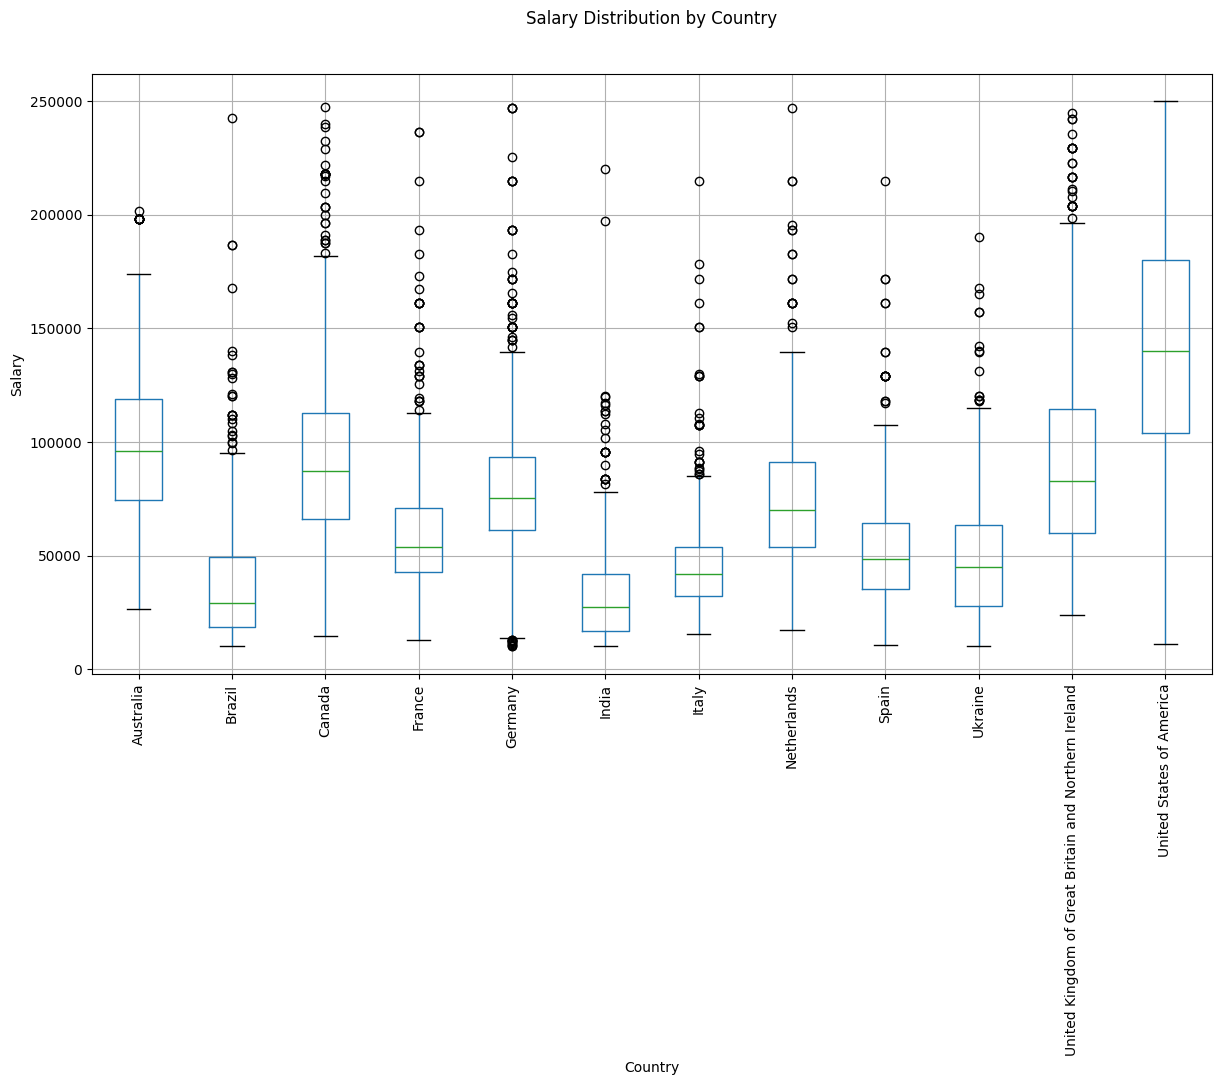

In [16]:
fig, ax = plt.subplots(1,1, figsize=(14, 8))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary Distribution by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Clean the YearsCodePro the work experience column
df['YearsCodePro'].unique()

array(['18', '25', '30', '50', '27', '1', '15', '11', '23', '17', '10',
       '8', '12', '26', '40', '4', '9', '22', '28', '20', '16', '13', '3',
       '35', '5', '31', '41', '36', '6', '14', '7', 'Less than 1 year',
       '24', '2', '38', '32', '21', '19', '34', '29', '43', '33', '45',
       '37', '44', '42', '39', '46', '49', '48', '47'], dtype=object)

In [18]:
# Define a function to add 0.5 value to YearCodePro column with 'Less than 1 year' value
def clean_experience(x):
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

In [19]:
# Transfform the YearsCodePro column to clean the work experience
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [20]:
# Review EdLevel unique values
df['EdLevel'].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [21]:
# Combine EdLevel values to reduce the number of categories
def shorten_edu(edu):
    if 'Bachelor’s degree' in edu:
        return 'Bachelor’s degree'
    if 'Master’s degree' in edu:
        return 'Master’s degree'
    if 'Professional degree' in edu or 'Other doctoral' in edu:
        return 'Post grad'
    return 'Less than a Bachelor’s degree'

In [22]:
# Transform the EdLevel 
df['EdLevel'] = df['EdLevel'].apply(shorten_edu)

In [23]:
# Check EdLevel Changes
df['EdLevel'].unique()

array(['Post grad', 'Master’s degree', 'Less than a Bachelor’s degree',
       'Bachelor’s degree'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder # Use LabelEncoder to map strings to unique values

# Transform EdLevel Strings to unique int values to fit model
le_edlevel = LabelEncoder()

# Fit EdLevel to data assign a unique number
df['EdLevel'] = le_edlevel.fit_transform(df['EdLevel'])

df['EdLevel'].unique()


array([3, 2, 1, 0])

In [25]:
# Transform Country Strings to unique int values to fit model
le_country = LabelEncoder()

# Map Country to a unique number
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([10, 11,  3,  4,  1,  2,  6,  5,  9,  8,  7,  0])

### Cleaning complete Begin Training Model

In [26]:
# Since we are focusing on Salary prediction
# Split the Salary data into training and testing sets, features x and target y
X = df.drop('Salary', axis=1) # input features columns excluding Salary
y = df['Salary']   # target column Salary 

In [27]:
# Perform Linear Regression to predict Salary 
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X, y.values) # Fit the model

LinearRegression()

In [28]:
# Predict new Salary values
y_pred = linear_reg_model.predict(X)

In [29]:
# Evaluate the model performance using root mean squared error and mean absolute error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [30]:
# Calculate and check error
error = np.sqrt(mean_squared_error(y, y_pred))

if error < 10000: # Salary range from 10k to 250k
    print('RMSE:', error, 'Model is good')
else:
    print('RMSE:', error,'Model is not good')


RMSE: 45073.43634339027 Model is not good


In [31]:
# Use the Decision Tree Regressor to predict Salary
from sklearn.tree import DecisionTreeRegressor
d_tree_reg_model = DecisionTreeRegressor(random_state=0)


In [32]:
# Fit the model
d_tree_reg_model.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [33]:
# Predict new Salary values
y_pred = d_tree_reg_model.predict(X)

In [34]:
# Calulate and check RMSE
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$31,646.22


In [35]:
# Use the Random Forest Regressor to predict Salary
from sklearn.ensemble import RandomForestRegressor
rand_forest_reg_model = RandomForestRegressor(random_state=0)


In [36]:
# Fit the rand_forest_reg_model
rand_forest_reg_model.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [37]:
# Calulate and check RMSE for Rand reg prediction
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$31,646.22


In [38]:
# Use the Gradient Boosting Regressor to predict Salary
from sklearn.model_selection import GridSearchCV

# To find the best model with the best parameters
# Define the parameters to be used in the GridSearchCV
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {'max_depth': max_depth} 



In [39]:
# Fit the model
regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')

In [40]:
# Check the best parameters, call the fit method
gs.fit(X, y.values)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [41]:
# Fit and predicit the model with the best parameters
regressor = gs.best_estimator_
regressor.fit(X, y.values)

# Predict new Salary values
y_pred = regressor.predict(X)

In [42]:
# Calulate and check RMSE for Gradient Boosting Regressor prediction
# Result might be slightly higher due to randomness in GBR
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,603.23


### Apply Predictions to new data

In [43]:
# Review the feature importance
X

,Country,EdLevel,YearsCodePro
392,10,3,18.0
395,10,2,25.0
398,11,1,30.0
409,3,3,50.0
414,10,0,27.0
...,...,...,...
41163,11,0,2.0
41164,11,0,13.0
41167,11,1,25.0
41184,11,2,30.0


### Build App Layer Array 

In [44]:
# Country, EdLevel, and YearsCodePro 
X = np.array([['United States of America', 'Master’s degree', 10]])
X

array([['United States of America', 'Master’s degree', '10']],
      dtype='<U24')

In [45]:
# Apply label encoding to the input features  
# Transform the strings to unique int values
X[:, 0] = le_country.transform(X[:, 0])
X[:, 1] = le_edlevel.transform(X[:, 1])
X


array([['11', '2', '10']], dtype='<U24')

In [46]:
# Predict the Salary 
y_pred = regressor.predict(X)
y_pred

c:\Codebase\MLApp\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([162682.20338983])

### Dave Model Using Pickle

In [47]:
import pickle

In [48]:
# Save the model to a file as 'wb' (write binary) mode
data = {'model': regressor, 'le_country': le_country, 'le_edlevel': le_edlevel}
with open('salary_prediction_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [49]:
# check saved model file by loading it
with open('salary_prediction_model.pkl', 'rb') as file:
    data = pickle.load(file)

# Load the model and the label encoders
model_loaded = data['model']
le_country = data['le_country'] 
le_edlevel = data['le_edlevel']


In [50]:
# Predict the Salary

y_pred = model_loaded.predict(X)
y_pred

c:\Codebase\MLApp\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([162682.20338983])

### Yey! Saving and Loading Works

Next covert code to app